<a href="https://colab.research.google.com/github/nausheen53/SMAI/blob/master/DAFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
import pandas as pd

In [219]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
data=pd.read_excel("/content/drive/My Drive/DA-1/earth.xls")

In [221]:
data

,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,Unnamed: 5,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,LAT (N),LONG (E),DEPTH (km),INTENSITY,Unnamed: 16,Unnamed: 17,LOCATION,REFERENCE
0,NaN,NaN,NaN,NaN,(UTC),(IST),Mw,Mw,Mb,Mb,Ms,ML,NaN,NaN,NaN,MM,MMI,MME,NaN,NaN
1,1.0,-2474.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.9692,8.78459,7.42707,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
2,2.0,-325.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.9692,8.78459,7.42707,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
3,3.0,25.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.9692,8.78459,7.42707,72.9,33.72,0.0,NaN,NaN,NaN,NaN,Dr STGR
4,4.0,26.0,5,10.0,08.19.10.0,NaN,6.1397,6.1397,5.73705,5.73705,6.40228,5.99969,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52985,52970.0,2019.0,7,28.0,19:24:08,00:54:08/2019-07-29/,3.2,3.2,NaN,3.07428,1.25394,2.91501,32.8°N,78.4°E,10.0,NaN,NaN,NaN,Jammu & Kashmir,NaN
52986,52971.0,2019.0,7,28.0,10:44:10,16:14:10,3.6,3.6,NaN,3.43659,1.95447,3.33473,25.5°N,90.4°E,70.0,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN
52987,52972.0,2019.0,7,28.0,21:25:06,2019-07-29 02:55:06,4,4,NaN,3.79891,2.65499,3.75446,23.2°N,86.5°E,22.0,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN
52988,52973.0,2019.0,7,29.0,03:33:53,09:03:53,4.3,4.3,NaN,4.07065,3.18039,4.06925,32.8°N,76.4°E,20.0,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


In [222]:
features = ['YEAR ', 'MONTH ', 'DATE','Unnamed: 7','LAT (N)', 'LONG (E)', 'DEPTH (km)']

In [223]:
data=data.drop([0])

In [224]:
data1 = data.reset_index(drop=True)

In [225]:
final_data=data1[features]
final_data

,YEAR,MONTH,DATE,Unnamed: 7,LAT (N),LONG (E),DEPTH (km)
0,-2474.0,0,0.0,7.5,71,24,0.0
1,-325.0,0,0.0,7.5,71,24,0.0
2,25.0,0,0.0,7.5,72.9,33.72,0.0
3,26.0,5,10.0,6.1397,17.3,80.1,NaN
4,26.0,5,10.0,6.1397,26,97,80.0
...,...,...,...,...,...,...,...
52984,2019.0,7,28.0,3.2,32.8°N,78.4°E,10.0
52985,2019.0,7,28.0,3.6,25.5°N,90.4°E,70.0
52986,2019.0,7,28.0,4,23.2°N,86.5°E,22.0
52987,2019.0,7,29.0,4.3,32.8°N,76.4°E,20.0


In [226]:
final_data_1 = final_data.rename(columns = {'Unnamed: 7': 'MAGNITUDE'}, inplace = False)

In [227]:
final_data_1

,YEAR,MONTH,DATE,MAGNITUDE,LAT (N),LONG (E),DEPTH (km)
0,-2474.0,0,0.0,7.5,71,24,0.0
1,-325.0,0,0.0,7.5,71,24,0.0
2,25.0,0,0.0,7.5,72.9,33.72,0.0
3,26.0,5,10.0,6.1397,17.3,80.1,NaN
4,26.0,5,10.0,6.1397,26,97,80.0
...,...,...,...,...,...,...,...
52984,2019.0,7,28.0,3.2,32.8°N,78.4°E,10.0
52985,2019.0,7,28.0,3.6,25.5°N,90.4°E,70.0
52986,2019.0,7,28.0,4,23.2°N,86.5°E,22.0
52987,2019.0,7,29.0,4.3,32.8°N,76.4°E,20.0


In [228]:
final_data_1.isnull().sum(axis = 0)

YEAR             0
MONTH           18
DATE            57
MAGNITUDE     2507
LAT (N)          0
LONG (E)         0
DEPTH (km)    2178
dtype: int64

In [229]:
final_data_1['MAGNITUDE'].fillna((final_data_1['MAGNITUDE'].mean()), inplace=True)

In [230]:
final_data_1['DEPTH (km)'].fillna((final_data_1['DEPTH (km)'].mean()), inplace=True)

In [231]:
final_data_1['MONTH ']=final_data_1['MONTH '].fillna(final_data_1['MONTH '].mode()[0])
final_data_1['DATE']=final_data_1['DATE'].fillna(final_data_1['DATE'].mode()[0])

In [232]:
latitude = final_data_1['LAT (N)'].tolist()
latitude_1=[]
for lat in latitude:
  if(type(lat)==int):
    latitude_1.append(float(lat))
  elif(type(lat)==float):
    latitude_1.append(lat)
  elif(type(lat)==str):
    s=''
    if(lat[-1]=='S'):
      # print("S wala")
      for char in lat:
        if(char >= '0' and char <= '9'):
          s = s+char
        elif(char == '.'):
          s = s+ char
        else:
          continue
      if(lat[0]>='0' and lat[0]<='9'):
        latitude_1.append(-1*float(s))
      else:
        # print("haa bhai")
        latitude_1.append(float(s))
    else:
      for char in lat:
        if(char >= '0' and char <= '9'):
          s = s+char
        elif(char == '.'):
          s = s+ char
        else:
          continue
      # print(s)
      if(lat[0]>='0' and lat[0]<='9'):
        latitude_1.append(float(s))
      else:
        # print("minus ",-1*s)
        latitude_1.append(-1*float(s))
  



print(len(latitude_1)) 

52989


In [233]:
longitude = final_data_1['LONG (E)'].tolist()
longitude_1=[]
for long in longitude:
  if(type(long)==int):
    longitude_1.append(float(long))
  elif(type(long)==float):
    longitude_1.append(long)
  elif(type(long)==str):
    s=''
    if(long[-1]=='S'):
      # print("S wala")
      for char in long:
        if(char >= '0' and char <= '9'):
          s = s+char
        elif(char == '.'):
          s = s+ char
        else:
          continue
      if(long[0]>='0' and long[0]<='9'):
        longitude_1.append(-1*float(s))
      else:
        # print("haa bhai")
        longitude_1.append(float(s))
    else:
      for char in long:
        if(char >= '0' and char <= '9'):
          s = s+char
        elif(char == '.'):
          s = s+ char
        else:
          continue
      # print(s)
      if(long[0]>='0' and long[0]<='9'):
        longitude_1.append(float(s))
      else:
        # print("minus ",-1*s)
        longitude_1.append(-1*float(s))
  



print(len(longitude_1)) 

52989


In [234]:
import math
date = final_data_1['DATE'].tolist()
date_int =[]


for dt in date:
  date_int.append(int(dt))

year = final_data_1['YEAR '].tolist()
year_int =[]
for yr in year:
  year_int.append(int(yr))
  

month = final_data_1['MONTH '].tolist()
# month_int=[]

# for mt in month:
#   month_int.append(int(mt))

In [235]:
final_data_2 = final_data_1.drop(['LAT (N)','LONG (E)','DATE','YEAR ','MONTH '],axis=1)
print(final_data_2)

       MAGNITUDE  DEPTH (km)
0         7.5000    0.000000
1         7.5000    0.000000
2         7.5000    0.000000
3         6.1397   45.569867
4         6.1397   80.000000
...          ...         ...
52984     3.2000   10.000000
52985     3.6000   70.000000
52986     4.0000   22.000000
52987     4.3000   20.000000
52988     3.0000   10.000000

[52989 rows x 2 columns]


In [236]:

df_latitude = pd.DataFrame (latitude_1,columns=['latitude'])
print(df_latitude)
df_longitude = pd.DataFrame(longitude_1,columns=['longitude'])
print(df_longitude)

df_date = pd.DataFrame(date_int,columns=['date'])
df_year = pd.DataFrame(year_int,columns=['years'])
df_month = pd.DataFrame(month,columns=['month']) 

       latitude
0          71.0
1          71.0
2          72.9
3          17.3
4          26.0
...         ...
52984      32.8
52985      25.5
52986      23.2
52987      32.8
52988      20.0

[52989 rows x 1 columns]
       longitude
0          24.00
1          24.00
2          33.72
3          80.10
4          97.00
...          ...
52984      78.40
52985      90.40
52986      86.50
52987      76.40
52988      72.80

[52989 rows x 1 columns]


In [237]:
df11 = pd.concat([final_data_2,df_latitude],axis=1)
df22 = pd.concat([df11,df_longitude],axis=1)
df22

,MAGNITUDE,DEPTH (km),latitude,longitude
0,7.5000,0.000000,71.0,24.00
1,7.5000,0.000000,71.0,24.00
2,7.5000,0.000000,72.9,33.72
3,6.1397,45.569867,17.3,80.10
4,6.1397,80.000000,26.0,97.00
...,...,...,...,...
52984,3.2000,10.000000,32.8,78.40
52985,3.6000,70.000000,25.5,90.40
52986,4.0000,22.000000,23.2,86.50
52987,4.3000,20.000000,32.8,76.40


In [238]:
target_label=df22['MAGNITUDE']

In [239]:
target_label=pd.to_numeric(target_label)

In [240]:
print(target_label)

0        7.5000
1        7.5000
2        7.5000
3        6.1397
4        6.1397
          ...  
52984    3.2000
52985    3.6000
52986    4.0000
52987    4.3000
52988    3.0000
Name: MAGNITUDE, Length: 52989, dtype: float64


In [241]:
count=0
for i in range(0,len(target_label)):
    
#     print(target_label.iloc[i])
    if(target_label.iloc[i]<=4.5):
        target_label.iloc[i]=0
        # print("A ",target_label.iloc[i])
    else:
        target_label.iloc[i]=1
        count=count+1
        # print("T",target_label.iloc[i])
        
# print(target_label)

In [242]:
df22=df22.drop('MAGNITUDE',axis=1)

## **USING LATITUDE,LONGITUDE,DEPTH AS FEATURE**

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df22, target_label, test_size=0.2, random_state=42)

# **KNN WITH K = 3**

In [244]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [245]:
predicted=model.predict(X_test)

In [246]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,precision_score,classification_report
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 3 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

0.6146442725042461
**********KNN WITH K = 3 ***********
accuracy score  0.6146442725042461
********************
f1 score  [0.62421789 0.6045701 ]
********************
recall score  0.6146442725042461
********************
confusion matrix  [[3392 2044]
 [2040 3122]]
********************
precision score  0.6146518632473564
********************
classification report                precision    recall  f1-score   support

         0.0       0.62      0.62      0.62      5436
         1.0       0.60      0.60      0.60      5162

    accuracy                           0.61     10598
   macro avg       0.61      0.61      0.61     10598
weighted avg       0.61      0.61      0.61     10598



In [247]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [248]:
y_test=y_test.to_numpy()
fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(0,2):
fpr, tpr,threshlod = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)

print("roc_auc ",roc_auc)
print("fpr,tpr ",fpr,tpr)
print("threshold ",threshlod)

roc_auc  0.6143918802958279
fpr,tpr  [0.         0.37555228 1.        ] [0.         0.60433604 1.        ]
threshold  [2. 1. 0.]


# **KNN WITH K = 5**

In [249]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train,y_train)
predicted=model.predict(X_test)
from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 5***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
# for i in range(0,2):
fpr_1, tpr_1,threshlod_1 = roc_curve(y_test, predicted)
roc_auc_1 = auc(fpr_1, tpr_1)

print("roc_auc ",roc_auc_1)
print("fpr,tpr ",fpr_1,tpr_1)
print("threshold ",threshlod_1)

0.6257784487639177
**********KNN WITH K = 5***********
accuracy score  0.6257784487639177
********************
f1 score  [0.6366801  0.61420233]
********************
recall score  0.6257784487639179
********************
confusion matrix  [[3475 2009]
 [1957 3157]]
********************
precision score  0.6259188577399756
********************
classification report                precision    recall  f1-score   support

         0.0       0.64      0.63      0.64      5484
         1.0       0.61      0.62      0.61      5114

    accuracy                           0.63     10598
   macro avg       0.63      0.63      0.63     10598
weighted avg       0.63      0.63      0.63     10598

roc_auc  0.6254193258059237
fpr,tpr  [0.         0.36027246 1.        ] [0.         0.61111111 1.        ]
threshold  [2. 1. 0.]


# **KNN WITH K =7**

In [250]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
model.fit(X_train,y_train)
predicted=model.predict(X_test)
from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 7 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
# for i in range(0,2):
fpr_2, tpr_2,threshlod_2 = roc_curve(y_test, predicted)
roc_auc_2 = auc(fpr_2, tpr_2)

print("ROC_AUC ",roc_auc_2)
print("FPR,TPR ",fpr_2,tpr_2)
print("THRESHOLD ",threshlod_2)

0.6316286091715418
**********KNN WITH K = 7 ***********
accuracy score  0.6316286091715418
********************
f1 score  [0.6441852  0.61815336]
********************
recall score  0.6316286091715418
********************
confusion matrix  [[3534 2006]
 [1898 3160]]
********************
precision score  0.6320249957732524
********************
classification report                precision    recall  f1-score   support

         0.0       0.65      0.64      0.64      5540
         1.0       0.61      0.62      0.62      5058

    accuracy                           0.63     10598
   macro avg       0.63      0.63      0.63     10598
weighted avg       0.63      0.63      0.63     10598

ROC_AUC  0.631140466412028
FPR,TPR  [0.        0.3494109 1.       ] [0.         0.61169183 1.        ]
THRESHOLD  [2. 1. 0.]


# **ROC FOR DIFFERENT VALUES OF K**

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

**According to the below present ROC curve for k=7, AUC is 0.631 it means there is 63% chance that model will be able to distinguish between positive class and negative class**.

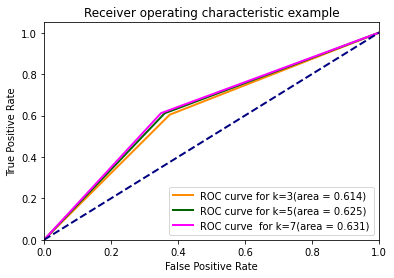

In [251]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for k=3(area = %0.3f)' % roc_auc)

plt.plot(fpr_1, tpr_1, color='darkgreen',
         lw=lw, label='ROC curve for k=5(area = %0.3f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='magenta',
         lw=lw, label='ROC curve  for k=7(area = %0.3f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **DECISION TREE CLASSIFIER WITH DEPTH =5**

In [252]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(random_state=42,max_depth=5)

In [253]:
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 

0.655689752783544

In [254]:
accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 5 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(0,2):
fpr, tpr,threshlod = roc_curve(prefict,y_test)
roc_auc = auc(fpr, tpr)

print("ROC_AUC ",roc_auc)
print("FPR,TPR ",fpr,tpr)
print("THRESHOLD ",threshlod)

0.655689752783544
**********DECISION TREE WITH DEPTH = 5 ***********
accuracy score  0.655689752783544
********************
f1 score  [0.68431525 0.62135519]
********************
recall score  0.655689752783544
********************
confusion matrix  [[3955 2172]
 [1477 2994]]
********************
precision score  0.6654303850621966
********************
classification report                precision    recall  f1-score   support

         0.0       0.73      0.65      0.68      6127
         1.0       0.58      0.67      0.62      4471

    accuracy                           0.66     10598
   macro avg       0.65      0.66      0.65     10598
weighted avg       0.67      0.66      0.66     10598

ROC_AUC  0.6575761785953378
FPR,TPR  [0.         0.35449649 1.        ] [0.         0.66964885 1.        ]
THRESHOLD  [2. 1. 0.]


# **DECISION TREE CLASSIFIER WITH DEPTH = 7**

In [255]:
clf = DecisionTreeClassifier(random_state=42,max_depth=7)
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 7 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
# for i in range(0,2):
fpr_1, tpr_1,threshlod_1 = roc_curve(prefict,y_test)
roc_auc_1 = auc(fpr_1, tpr_1)

print("ROC_AUC ",roc_auc_1)
print("FPR,TPR ",fpr_1,tpr_1)
print("THRESHOLD ",threshlod_1)

0.6539913191168145
**********DECISION TREE WITH DEPTH = 7 ***********
accuracy score  0.6539913191168145
********************
f1 score  [0.6676937  0.63911032]
********************
recall score  0.6539913191168145
********************
confusion matrix  [[3684 1919]
 [1748 3247]]
********************
precision score  0.6547927590086261
********************
classification report                precision    recall  f1-score   support

         0.0       0.68      0.66      0.67      5603
         1.0       0.63      0.65      0.64      4995

    accuracy                           0.65     10598
   macro avg       0.65      0.65      0.65     10598
weighted avg       0.65      0.65      0.65     10598

ROC_AUC  0.6537774790675023
FPR,TPR  [0.         0.34249509 1.        ] [0.         0.65005005 1.        ]
THRESHOLD  [2. 1. 0.]


# **DECISION TREE CLASSIFIER WITH DEPTH =3**

In [256]:
clf = DecisionTreeClassifier(random_state=42,max_depth=3)
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 3 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
# for i in range(0,2):
fpr_2, tpr_2,threshlod_2 = roc_curve(prefict,y_test)
roc_auc_2 = auc(fpr_2, tpr_2)

print("ROC_AUC ",roc_auc_2)
print("FPR,TPR ",fpr_2,tpr_2)
print("THRESHOLD ",threshlod_2)

0.6323834685789772
**********DECISION TREE WITH DEPTH = 3 ***********
accuracy score  0.6323834685789772
********************
f1 score  [0.64250321 0.62167411]
********************
recall score  0.6323834685789772
********************
confusion matrix  [[3501 1965]
 [1931 3201]]
********************
precision score  0.6324633055452709
********************
classification report                precision    recall  f1-score   support

         0.0       0.64      0.64      0.64      5466
         1.0       0.62      0.62      0.62      5132

    accuracy                           0.63     10598
   macro avg       0.63      0.63      0.63     10598
weighted avg       0.63      0.63      0.63     10598

ROC_AUC  0.632119188441607
FPR,TPR  [0.         0.35949506 1.        ] [0.         0.62373344 1.        ]
THRESHOLD  [2. 1. 0.]


# **ROC CURVE FOR DIFFERENT PRE-PRUNE DEPTH**

According to the below present ROC curve for pre-prune depth=5, AUC is 0.658 it means there is 65.8% chance that model will be able to distinguish between positive class and negative class.

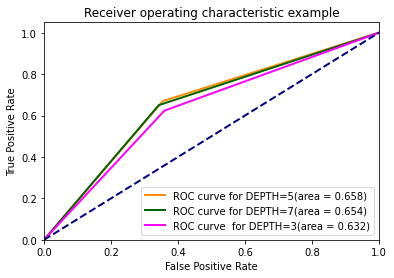

In [257]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for DEPTH=5(area = %0.3f)' % roc_auc)

plt.plot(fpr_1, tpr_1, color='darkgreen',
         lw=lw, label='ROC curve for DEPTH=7(area = %0.3f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='magenta',
         lw=lw, label='ROC curve  for DEPTH=3(area = %0.3f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **Using Year,month,date,latitude,longitude,depth as features**

In [258]:
df33 = pd.concat([df22,df_year],axis=1)
df44 = pd.concat([df33,df_date],axis=1)
df55 = pd.concat([df44,df_month],axis=1)
print(df55)

       DEPTH (km)  latitude  longitude  years  date month
0        0.000000      71.0      24.00  -2474     0     0
1        0.000000      71.0      24.00   -325     0     0
2        0.000000      72.9      33.72     25     0     0
3       45.569867      17.3      80.10     26    10     5
4       80.000000      26.0      97.00     26    10     5
...           ...       ...        ...    ...   ...   ...
52984   10.000000      32.8      78.40   2019    28     7
52985   70.000000      25.5      90.40   2019    28     7
52986   22.000000      23.2      86.50   2019    28     7
52987   20.000000      32.8      76.40   2019    29     7
52988   10.000000      20.0      72.80   2019    31     7

[52989 rows x 6 columns]


In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df44, target_label, test_size=0.2, random_state=42)

# **KNN CLASSIFIER WITH K = 3,5,7**

In [260]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [261]:
predicted=model.predict(X_test)

In [262]:
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 3 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

0.6750330250990753
**********KNN WITH K = 3 ***********
accuracy score  0.6750330250990753
********************
f1 score  [0.68542199 0.66393443]
********************
recall score  0.6750330250990753
********************
confusion matrix  [[3752 1764]
 [1680 3402]]
********************
precision score  0.6752881246825788
********************
classification report                precision    recall  f1-score   support

         0.0       0.69      0.68      0.69      5516
         1.0       0.66      0.67      0.66      5082

    accuracy                           0.68     10598
   macro avg       0.67      0.67      0.67     10598
weighted avg       0.68      0.68      0.68     10598



In [263]:
y_test=y_test.to_numpy()
fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(0,2):
fpr, tpr,threshlod = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)

print("roc_auc ",roc_auc)
print("fpr,tpr ",fpr,tpr)
print("threshold ",threshlod)

roc_auc  0.6746291174251949
fpr,tpr  [0.         0.30927835 1.        ] [0.         0.65853659 1.        ]
threshold  [2. 1. 0.]


In [264]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train,y_train)
predicted=model.predict(X_test)
from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 5***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
# for i in range(0,2):
fpr_1, tpr_1,threshlod_1 = roc_curve(y_test, predicted)
roc_auc_1 = auc(fpr_1, tpr_1)

print("roc_auc ",roc_auc_1)
print("fpr,tpr ",fpr_1,tpr_1)
print("threshold ",threshlod_1)

0.6839969805623702
**********KNN WITH K = 5***********
accuracy score  0.6839969805623702
********************
f1 score  [0.69579435 0.67124767]
********************
recall score  0.6839969805623702
********************
confusion matrix  [[3830 1747]
 [1602 3419]]
********************
precision score  0.684588769767172
********************
classification report                precision    recall  f1-score   support

         0.0       0.71      0.69      0.70      5577
         1.0       0.66      0.68      0.67      5021

    accuracy                           0.68     10598
   macro avg       0.68      0.68      0.68     10598
weighted avg       0.68      0.68      0.68     10598

roc_auc  0.6834541670158969
fpr,tpr  [0.       0.294919 1.      ] [0.         0.66182733 1.        ]
threshold  [2. 1. 0.]


In [265]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
model.fit(X_train,y_train)
predicted=model.predict(X_test)
from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 7 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
# for i in range(0,2):
fpr_2, tpr_2,threshlod_2 = roc_curve(y_test, predicted)
roc_auc_2 = auc(fpr_2, tpr_2)

print("ROC_AUC ",roc_auc_2)
print("FPR,TPR ",fpr_2,tpr_2)
print("THRESHOLD ",threshlod_2)

0.6894697112662767
**********KNN WITH K = 7 ***********
accuracy score  0.6894697112662767
********************
f1 score  [0.70165896 0.67624201]
********************
recall score  0.6894697112662767
********************
confusion matrix  [[3870 1729]
 [1562 3437]]
********************
precision score  0.6902124203441499
********************
classification report                precision    recall  f1-score   support

         0.0       0.71      0.69      0.70      5599
         1.0       0.67      0.69      0.68      4999

    accuracy                           0.69     10598
   macro avg       0.69      0.69      0.69     10598
weighted avg       0.69      0.69      0.69     10598

ROC_AUC  0.6888782124198267
FPR,TPR  [0.         0.28755523 1.        ] [0.         0.66531165 1.        ]
THRESHOLD  [2. 1. 0.]


In [266]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))

In [267]:
# y_test=y_test.to_numpy()

In [268]:
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# # for i in range(0,2):
# fpr, tpr,threshlod = roc_curve(y_test, predicted)
# roc_auc = auc(fpr, tpr)

# **ROC CURVE FOR DIFFERENT VALUES OF K**

According to the below present ROC curve for k=7, AUC is 0.689 it means there is 68.9% chance that model will be able to distinguish between positive class and negative class.

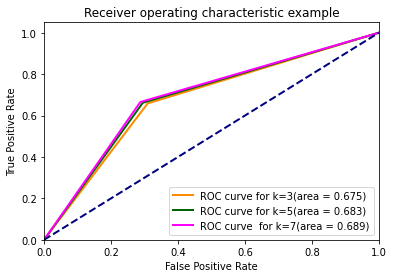

In [269]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for k=3(area = %0.3f)' % roc_auc)

plt.plot(fpr_1, tpr_1, color='darkgreen',
         lw=lw, label='ROC curve for k=5(area = %0.3f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='magenta',
         lw=lw, label='ROC curve  for k=7(area = %0.3f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **DECISION TREE WITH PRE-PRUNE DEPTH = 8,7,5**

In [270]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(random_state=42,max_depth=8)

In [271]:
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)

0.7098509152670315

In [272]:
# y_test=y_test.to_numpy()

In [273]:

fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(0,2):
fpr, tpr,threshlod = roc_curve(y_test, prefict)
roc_auc = auc(fpr, tpr)

In [274]:
print(roc_auc)
print(fpr,tpr)
print(threshlod)

0.7081063336406559
[0.         0.22238586 1.        ] [0.         0.63859853 1.        ]
[2. 1. 0.]


In [275]:
clf = DecisionTreeClassifier(random_state=42,max_depth=5)
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 5 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
# for i in range(0,2):
fpr_1, tpr_1,threshlod_1 = roc_curve(prefict,y_test)
roc_auc_1 = auc(fpr_1, tpr_1)

print("ROC_AUC ",roc_auc_1)
print("FPR,TPR ",fpr_1,tpr_1)
print("THRESHOLD ",threshlod_1)

0.6891866389884884
**********DECISION TREE WITH DEPTH = 5 ***********
accuracy score  0.6891866389884884
********************
f1 score  [0.73571887 0.62276683]
********************
recall score  0.6891866389884884
********************
confusion matrix  [[4585 2447]
 [ 847 2719]]
********************
precision score  0.737157378736058
********************
classification report                precision    recall  f1-score   support

         0.0       0.84      0.65      0.74      7032
         1.0       0.53      0.76      0.62      3566

    accuracy                           0.69     10598
   macro avg       0.69      0.71      0.68     10598
weighted avg       0.74      0.69      0.70     10598

ROC_AUC  0.7072491540953398
FPR,TPR  [0.         0.34798066 1.        ] [0.         0.76247897 1.        ]
THRESHOLD  [2. 1. 0.]


In [276]:
clf = DecisionTreeClassifier(random_state=42,max_depth=7)
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 7 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
# for i in range(0,2):
fpr_2, tpr_2,threshlod_2 = roc_curve(prefict,y_test)
roc_auc_2 = auc(fpr_2, tpr_2)

print("ROC_AUC ",roc_auc_2)
print("FPR,TPR ",fpr_2,tpr_2)
print("THRESHOLD ",threshlod_2)

0.705699188526137
**********DECISION TREE WITH DEPTH = 7 ***********
accuracy score  0.705699188526137
********************
f1 score  [0.72395787 0.684854  ]
********************
recall score  0.705699188526137
********************
confusion matrix  [[4090 1777]
 [1342 3389]]
********************
precision score  0.7096775371546107
********************
classification report                precision    recall  f1-score   support

         0.0       0.75      0.70      0.72      5867
         1.0       0.66      0.72      0.68      4731

    accuracy                           0.71     10598
   macro avg       0.70      0.71      0.70     10598
weighted avg       0.71      0.71      0.71     10598

ROC_AUC  0.7067292611098183
FPR,TPR  [0.         0.30288052 1.        ] [0.         0.71633904 1.        ]
THRESHOLD  [2. 1. 0.]


**According to the below present ROC curve for pre-prune depth=8, AUC is 0.70 it means there is 70% chance that model will be able to distinguish between positive class and negative class.**

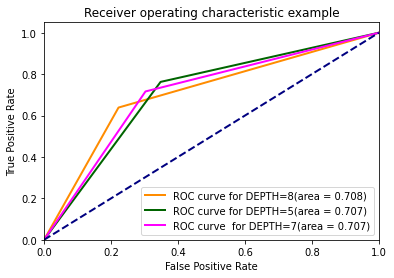

In [277]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for DEPTH=8(area = %0.3f)' % roc_auc)

plt.plot(fpr_1, tpr_1, color='darkgreen',
         lw=lw, label='ROC curve for DEPTH=5(area = %0.3f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='magenta',
         lw=lw, label='ROC curve  for DEPTH=7(area = %0.3f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **FEATURE PROCESSING , USING DATE,MONTH,YEAR CREATING A NEW FEATURE TIMESTAMP**

**date month and year has to be in yyyymmdd format for conversion into timestamp.**

In [278]:

import math
date = df55['date'].tolist()
date_str =[]
# hel = []
for dt in date:
  if(math.isnan(dt)):
    # print("hey")
    date_str.append('00')
  else:
    date_int = int(dt)
    date_s = str(date_int)
    if(len(date_s)==1):
      date_str.append('0'+date_s)
    else:
      date_str.append(str(date_int))

In [279]:
year = df55['years'].tolist()
year_str =[]
for yr in year:
  year_int = int(yr)
  year_str.append(str(year_int))

print(len(year_str))

52989


In [280]:
month = df55['month'].tolist()
month_str=[]
heal = []
for mt in month:
  if(type(mt)==int):
    month_s = str(mt)
    if(len(month_s)==1):
      month_str.append('0'+month_s)
    else:
      month_str.append(month_s)
  else:
    heal.append(1)
    month_str.append("00")

print(len(month_str))

52989


In [281]:
final_date=[]
for i in range(0,len(date)):
  s = year_str[i]+'-'+month_str[i] + '-'+date_str[i]
  final_date.append(s)

## **using numpy dateTime for converting date,month,year to timeStamp**

In [282]:
import numpy as np
from datetime import datetime
dt = datetime.utcnow()
timeStamp_=[]

def get_timestamp(date_str):
  dt64 = np.datetime64(dt)
  date_str = date_str.strip()
    # Remove + sign
  if date_str[0] == '+':
      date_str = date_str[1:]
    # Remove missing month/day
  date_str = date_str.split('-00', maxsplit=1)[0]
  if(date_str == "1995-06-31"):
      date_str = '1995-06-30'
  elif(date_str == "2015-11-31"):
      date_str = "2015-11-30"
  ts = (dt64 - np.datetime64(date_str)) / np.timedelta64(1, 's')
  return ts


for date1 in final_date:
  ts1 = get_timestamp(date1)
  timeStamp_.append(ts1)

In [283]:
df66  = df55.drop(['date','month','years'],axis=1)

In [284]:
df_timestamp =  pd.DataFrame(timeStamp_,columns=['timestamp'])

In [285]:
final_df = pd.concat([df66,df_timestamp],axis=1)
final_df

,DEPTH (km),latitude,longitude,timestamp
0,0.000000,71.0,24.00,1.418385e+11
1,0.000000,71.0,24.00,7.402255e+10
2,0.000000,72.9,33.72,6.297761e+10
3,45.569867,17.3,80.10,6.293493e+10
4,80.000000,26.0,97.00,6.293493e+10
...,...,...,...,...
52984,10.000000,32.8,78.40,3.512058e+07
52985,70.000000,25.5,90.40,3.512058e+07
52986,22.000000,23.2,86.50,3.512058e+07
52987,20.000000,32.8,76.40,3.503418e+07


In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target_label, test_size=0.2, random_state=42)

# **KNN WITH K=3,5,7**

In [287]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
# predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
# print(predicted)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [288]:
predicted=model.predict(X_test)

In [289]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predicted,y_test))
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 5***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)


0.6624834874504624
**********KNN WITH K = 5***********
accuracy score  0.705699188526137
********************
f1 score  [0.67649453 0.64720387]
********************
recall score  0.6624834874504624
********************
confusion matrix  [[3740 1885]
 [1692 3281]]
********************
precision score  0.6634559231792816
********************
classification report                precision    recall  f1-score   support

         0.0       0.69      0.66      0.68      5625
         1.0       0.64      0.66      0.65      4973

    accuracy                           0.66     10598
   macro avg       0.66      0.66      0.66     10598
weighted avg       0.66      0.66      0.66     10598



In [290]:
y_test=y_test.to_numpy()

In [291]:
fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(0,2):
fpr, tpr,threshlod = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)


In [292]:
print(roc_auc)
print(fpr,tpr)
print(threshlod)

0.6618133633471829
[0.         0.31148748 1.        ] [0.         0.63511421 1.        ]
[2. 1. 0.]


In [293]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)
predicted=model.predict(X_test)
from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 3***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
# for i in range(0,2):
fpr_1, tpr_1,threshlod_1 = roc_curve(y_test, predicted)
roc_auc_1 = auc(fpr_1, tpr_1)

print("roc_auc ",roc_auc_1)
print("fpr,tpr ",fpr_1,tpr_1)
print("threshold ",threshlod_1)

0.6597471220985092
**********KNN WITH K = 3***********
accuracy score  0.6597471220985092
********************
f1 score  [0.67366516 0.644589  ]
********************
recall score  0.659747122098509
********************
confusion matrix  [[3722 1896]
 [1710 3270]]
********************
precision score  0.6606635015301535
********************
classification report                precision    recall  f1-score   support

         0.0       0.69      0.66      0.67      5618
         1.0       0.63      0.66      0.64      4980

    accuracy                           0.66     10598
   macro avg       0.66      0.66      0.66     10598
weighted avg       0.66      0.66      0.66     10598

roc_auc  0.6590918615371721
fpr,tpr  [0.         0.31480118 1.        ] [0.        0.6329849 1.       ]
threshold  [2. 1. 0.]


In [294]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
model.fit(X_train,y_train)
predicted=model.predict(X_test)
from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted,y_test))
accu_score = accuracy_score(predicted,y_test,normalize=True)
print(accu_score) 
f11 = f1_score(predicted,y_test,average=None)
re = recall_score(predicted,y_test,average='weighted')
cm = confusion_matrix(predicted,y_test)
pr_sc = precision_score(predicted,y_test,average='weighted')
clrp = classification_report(predicted,y_test)
print("**********KNN WITH K = 7 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
# for i in range(0,2):
fpr_2, tpr_2,threshlod_2 = roc_curve(y_test, predicted)
roc_auc_2 = auc(fpr_2, tpr_2)

print("ROC_AUC ",roc_auc_2)
print("FPR,TPR ",fpr_2,tpr_2)
print("THRESHOLD ",threshlod_2)

0.6655029250802038
**********KNN WITH K = 7 ***********
accuracy score  0.6655029250802038
********************
f1 score  [0.68100423 0.64841813]
********************
recall score  0.6655029250802038
********************
confusion matrix  [[3784 1897]
 [1648 3269]]
********************
precision score  0.6670024073509262
********************
classification report                precision    recall  f1-score   support

         0.0       0.70      0.67      0.68      5681
         1.0       0.63      0.66      0.65      4917

    accuracy                           0.67     10598
   macro avg       0.66      0.67      0.66     10598
weighted avg       0.67      0.67      0.67     10598

ROC_AUC  0.6647019967990548
FPR,TPR  [0.         0.30338733 1.        ] [0.         0.63279133 1.        ]
THRESHOLD  [2. 1. 0.]


**According to the below present ROC curve for k = 7, AUC is 0.665 it means there is 66.5% chance that model will be able to distinguish between positive class and negative class.**

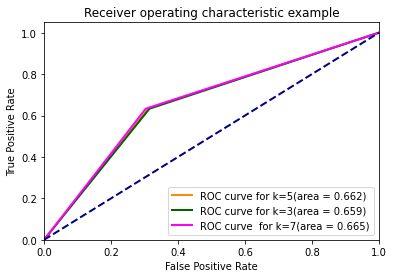

In [295]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for k=5(area = %0.3f)' % roc_auc)

plt.plot(fpr_1, tpr_1, color='darkgreen',
         lw=lw, label='ROC curve for k=3(area = %0.3f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='magenta',
         lw=lw, label='ROC curve  for k=7(area = %0.3f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **DECISION TREE CLASSIFIER WITH PRE-PRUNE DEPTH = 9,7,3**

In [296]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(random_state=42,max_depth=9)

In [297]:
clf = clf.fit(X_train, y_train)
# tree.plot_tree(clf) 
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 9 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)


0.7107944895263257
**********DECISION TREE WITH DEPTH = 9 ***********
accuracy score  0.7107944895263257
********************
f1 score  [0.73479277 0.68202096]
********************
recall score  0.7107944895263257
********************
confusion matrix  [[4246 1879]
 [1186 3287]]
********************
precision score  0.72030140352697
********************
classification report                precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      6125
         1.0       0.64      0.73      0.68      4473

    accuracy                           0.71     10598
   macro avg       0.71      0.71      0.71     10598
weighted avg       0.72      0.71      0.71     10598



In [298]:
# y_test=y_test.to_numpy()

In [299]:
fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(0,2):
fpr, tpr,threshlod = roc_curve(y_test, prefict)
roc_auc = auc(fpr, tpr)


In [300]:
print(roc_auc)
print(fpr,tpr)
print(threshlod)

0.7089699302736767
[0.         0.21833579 1.        ] [0.         0.63627565 1.        ]
[2. 1. 0.]


In [301]:
clf = DecisionTreeClassifier(random_state=42,max_depth=7)
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 7 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
# for i in range(0,2):
fpr_1, tpr_1,threshlod_1 = roc_curve(prefict,y_test)
roc_auc_1 = auc(fpr_1, tpr_1)

print("ROC_AUC ",roc_auc_1)
print("FPR,TPR ",fpr_1,tpr_1)
print("THRESHOLD ",threshlod_1)

0.7091904132855256
**********DECISION TREE WITH DEPTH = 7 ***********
accuracy score  0.7091904132855256
********************
f1 score  [0.73097067 0.6835729 ]
********************
recall score  0.7091904132855256
********************
confusion matrix  [[4187 1837]
 [1245 3329]]
********************
precision score  0.7162508942575899
********************
classification report                precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      6024
         1.0       0.64      0.73      0.68      4574

    accuracy                           0.71     10598
   macro avg       0.71      0.71      0.71     10598
weighted avg       0.72      0.71      0.71     10598

ROC_AUC  0.711431239043244
FPR,TPR  [0.         0.30494688 1.        ] [0.         0.72780936 1.        ]
THRESHOLD  [2. 1. 0.]


In [302]:
clf = DecisionTreeClassifier(random_state=42,max_depth=3)
clf = clf.fit(X_train, y_train)
prefict=clf.predict(X_test)
accuracy_score(prefict,y_test)
# tree.plot_tree(clf) 


accu_score = accuracy_score(prefict,y_test)
print(accu_score) 
f11 = f1_score(prefict,y_test,average=None)
re = recall_score(prefict,y_test,average='weighted')
cm = confusion_matrix(prefict,y_test)
pr_sc = precision_score(prefict,y_test,average='weighted')
clrp = classification_report(prefict,y_test)
print("**********DECISION TREE WITH DEPTH = 3 ***********")
print("accuracy score ",accu_score)
print("********************")
print("f1 score ",f11)
print("********************")
print("recall score ",re)
print("********************")
print("confusion matrix ",cm)
print("********************")
print("precision score ",pr_sc)
print("********************")
print("classification report ",clrp)

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
# for i in range(0,2):
fpr_2, tpr_2,threshlod_2 = roc_curve(prefict,y_test)
roc_auc_2 = auc(fpr_2, tpr_2)

print("ROC_AUC ",roc_auc_2)
print("FPR,TPR ",fpr_2,tpr_2)
print("THRESHOLD ",threshlod_2)

0.6755991696546518
**********DECISION TREE WITH DEPTH = 3 ***********
accuracy score  0.6755991696546518
********************
f1 score  [0.73319882 0.58628159]
********************
recall score  0.6755991696546518
********************
confusion matrix  [[4724 2730]
 [ 708 2436]]
********************
precision score  0.7515561111877077
********************
classification report                precision    recall  f1-score   support

         0.0       0.87      0.63      0.73      7454
         1.0       0.47      0.77      0.59      3144

    accuracy                           0.68     10598
   macro avg       0.67      0.70      0.66     10598
weighted avg       0.75      0.68      0.69     10598

ROC_AUC  0.7042814247998411
FPR,TPR  [0.         0.36624631 1.        ] [0.         0.77480916 1.        ]
THRESHOLD  [2. 1. 0.]


**According to the below present ROC curve for pre-prune depth=9, AUC is 0.711 it means there is 71.1% chance that model will be able to distinguish between positive class and negative class.**

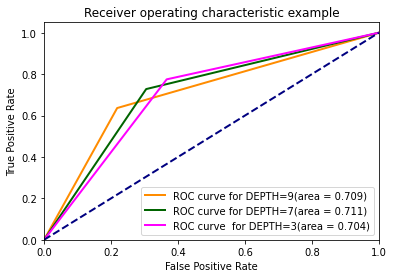

In [303]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for DEPTH=9(area = %0.3f)' % roc_auc)

plt.plot(fpr_1, tpr_1, color='darkgreen',
         lw=lw, label='ROC curve for DEPTH=7(area = %0.3f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='magenta',
         lw=lw, label='ROC curve  for DEPTH=3(area = %0.3f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**DATA CLEANING : dropped all the columns having null values more than 60% of the dataset , In case of magnitude and depth,replaced nan values by mean , In case of date and month,replaced nan values by mode**

**Decision Tree classifers are better because they can distinguish postive and negetive class better than KNN classifiers, as observed in the above ROC curves**

**Observation : feature does help in improvising the model to a little extent**
**New feature - TimeStamp is created using existing features Date,month and year, without using additional feature, maximum AUC was around 70% and after using new feature AUC is 71% and has better accuracy and precision**